In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "./cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

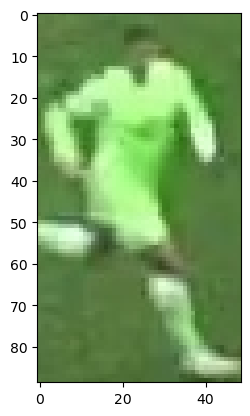

In [5]:
plt.imshow(image)
plt.show()

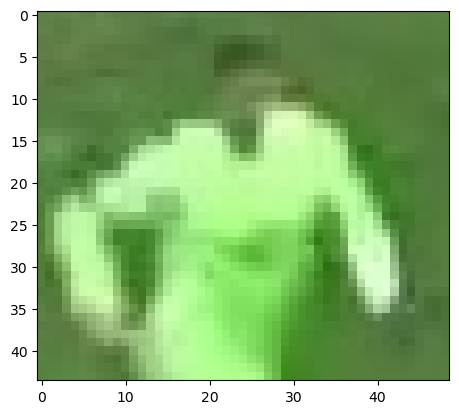

In [6]:
'''
Take top half of the image
'''
top_half = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half)
plt.show()

/Users/leodagraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


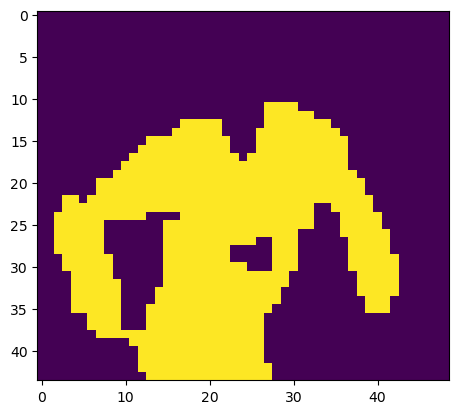

In [8]:
'''
Cluster the images into two clusters
'''
#reshape image into 2d array
image_2d = top_half.reshape(-1, 3)

#kmeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#get cluster labels
labels = kmeans.labels_

#reshape labels into original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

0


In [10]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [11]:
kmeans.cluster_centers_[player_cluster]

array([171.38378378, 235.65405405, 142.8472973 ])